<a href="https://colab.research.google.com/github/umeshtiwari233/ML_Summer_training/blob/main/day6/ANN_for_Image_Data_Practice_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Neural Network

### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras import optimizers
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [ ]:

batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('x_train shape:', x_train.shape)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Visualize Data

Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


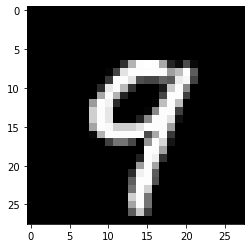

In [ ]:
print("Label:",y_test[12:13])
plt.imshow(x_test[12:13].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# BELOW WE ARE TRYING WITH TANH OR RELU

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='tanh', input_shape=(784,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#above we are using tanh as the activation function as opposite to sigmoid

### Weights before Training

[[array([[-0.00724748, -0.06105874, -0.06667647, ..., -0.08455032,
        -0.07089642, -0.00135032],
       [-0.02347753,  0.07185277, -0.07317282, ..., -0.02778573,
         0.02389145,  0.03936955],
       [-0.01569644,  0.05750418,  0.02741701, ..., -0.01049907,
         0.03589055, -0.0085159 ],
       ...,
       [ 0.00907946, -0.00466818,  0.02598994, ...,  0.0661347 ,
        -0.01684015,  0.07725774],
       [ 0.02384011, -0.0334801 ,  0.03340627, ...,  0.05648991,
         0.06565393, -0.0544986 ],
       [-0.02339498,  0.07023973, -0.07454033, ...,  0.08175958,
        -0.04427933,  0.05390512]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)], [array([[ 0.24453601, -0.08655098, -0.02231553, ..., -0.2510756 ,
         0.18656507,  0.00367352],
       [-0.15785888, -0.24249579,  0.18345466, ...,  0.16566488,
         0.07488427,  0.28792903],
  

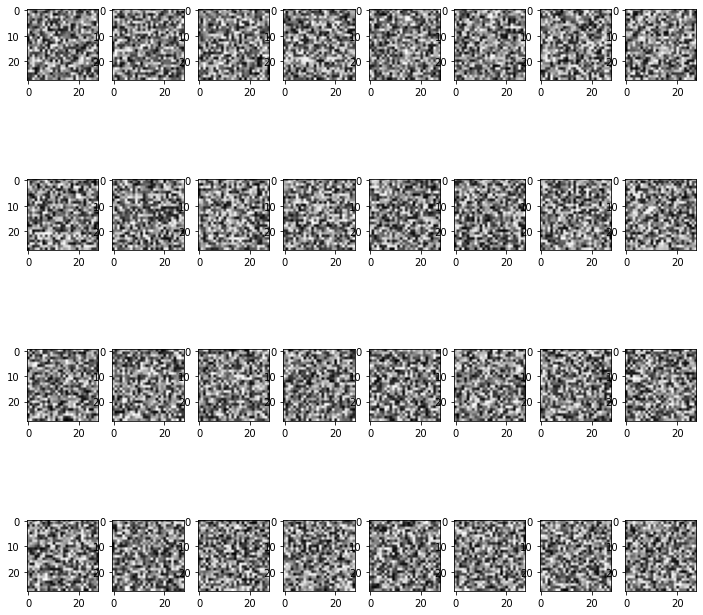

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)
print(w)
layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Training

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
epochs=10
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 3ms/step - loss: 0.4589 - accuracy: 0.8783
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2019 - accuracy: 0.9416
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1517 - accuracy: 0.9559
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1246 - accuracy: 0.9625
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1072 - accuracy: 0.9682
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0957 - accuracy: 0.9713
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9739
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0798 - accuracy: 0.9760
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0742 - accuracy: 0.9779
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0686 - accuracy: 0.9799

In [ ]:
#as seen above tanh gives better accuracy try with RELU

### Testing

In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10267096012830734
Test accuracy: 0.9677000045776367


### Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


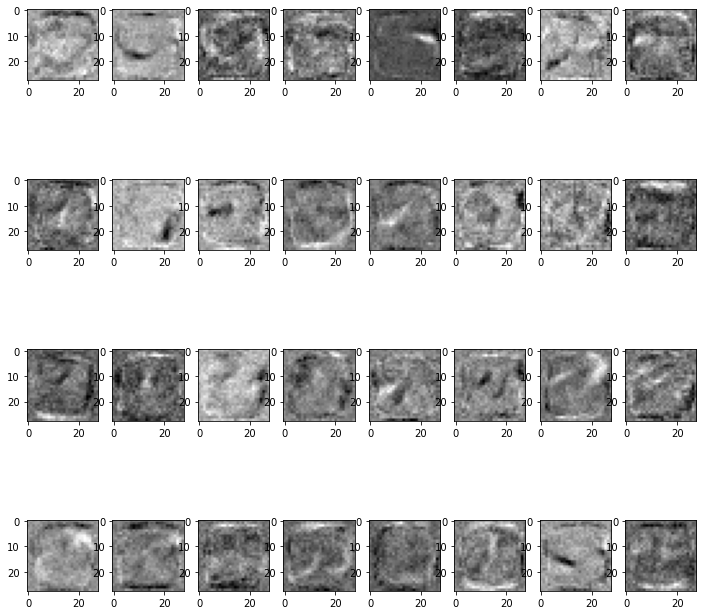

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[88:89])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [2.1217445e-05 2.6748985e-06 1.2907048e-05 1.3184009e-06 4.8136262e-05
 5.6935645e-05 9.9985135e-01 1.0489448e-06 4.1568587e-06 9.1934425e-08]

Thresholded output
 [0 0 0 0 0 0 1 0 0 0]


### Ground truth

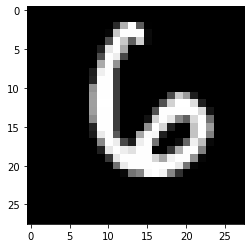

In [ ]:
# Write the index of the test sample to show
plt.imshow(x_test[88:89].reshape(28,28),cmap='gray')
plt.show()

### User Input

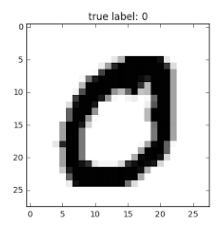

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('/content/sample_data/mnist sample.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

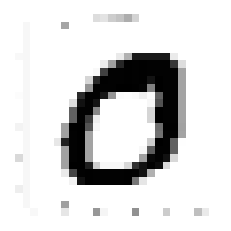

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('/content/sample_data/mnist sample.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [4.3673333e-04 7.2645891e-04 8.5487282e-01 2.0347772e-02 4.7435101e-06
 3.5698508e-04 5.3176977e-04 1.1925354e-01 3.4611020e-03 7.9294050e-06]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit:
 2


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [ ]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [ ]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0658 - accuracy: 0.9804
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0608 - accuracy: 0.9821
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0576 - accuracy: 0.9821
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0538 - accuracy: 0.9833
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0507 - accuracy: 0.9845
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0485 - accuracy: 0.9853
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0452 - accuracy: 0.9865
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0434 - accuracy: 0.9866
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0407 - accuracy: 0.9878
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0389 - accuracy: 0.9882

### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [ ]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 6280      
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.9813 - accuracy: 0.4198 - val_loss: 1.6896 - val_accuracy: 0.5669
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 1.4685 - accuracy: 0.6360 - val_loss: 1.2763 - val_accuracy: 0.6878
Epoch 3/10
469/469 [============

### Relu Activation Function

In [ ]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8645 - accuracy: 0.8063 - val_loss: 0.3575 - val_accuracy: 0.9106
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2923 - accuracy: 0.9206 - val_loss: 0.2360 - val_accuracy: 0.9338
Epoch 3/10
469/469 [========

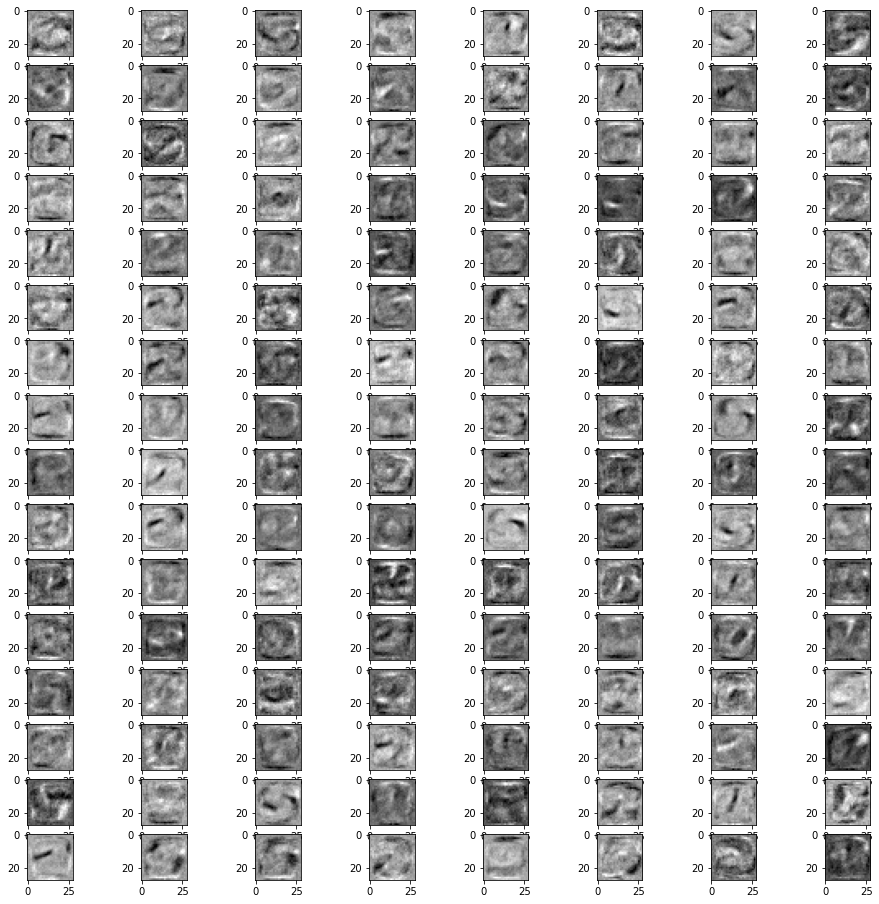

In [ ]:
#first_layer_size = 8
first_layer_size =128
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [ ]:
# Write your code here 

# Use the same layer design from the above cell 
# below we are trying with fewer hidden layers

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 6280      
                                                                 
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,658
Trainable params: 6,658
Non-traina

In [ ]:
#below try withincreased epochs  try ifferent.

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))


model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                50240     
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 10)                90        
                                                                 
Total params: 53,074
Trainable params: 53,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================

### Lower number of Layers. For example 1 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 8)                 6280      
                                                                 
 dense_66 (Dense)            (None, 8)                 72        
                                                                 
 dense_67 (Dense)            (None, 8)                 72        
                                                                 
 dense_68 (Dense)            (None, 8)                 72        
                                                                 
 dense_69 (Dense)            (None, 8)                 72        
                                                                 
 dense_70 (Dense)            (None, 8)                 72        
                                                                 
 dense_71 (Dense)            (None, 8)                

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.dropout((0.2))
model.add(Dense(64, activation='relu'))
model.dropout((0.5))
model.add(Dense(32, activation='relu'))
model.dropout((0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

AttributeError: ignored

In [ ]:
#underfittingbelowaslowtraingbuthightestingaccuracy

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.95))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#underfitting

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.95))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.95))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#RMSPROP optimizers

In [ ]:
from keras.layers import Dropout
from keras.optimizers import RMSprop

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#sgd optimizer

In [ ]:
from keras.layers import Dropout
from keras.optimizers import SGD

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#adam optimizer

In [ ]:
from keras.layers import Dropout
from keras.optimizers import Adam
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#ADAMAX OPTIMIZER

In [ ]:
#SGD IS SLOW LEARNER AS COMPARED RMS AND ADAM

In [ ]:
from keras.layers import Dropout
from keras.optimizers import Adamax

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adamax(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#NADAM OPTIMIZER

In [ ]:
from keras.layers import Dropout
from keras.optimizers import Nadam

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Nadam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here 

# Use the same number of units from the above cell 


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science